In [1]:
from pylab import *
from classy import *

Version:  0.0.65


In [2]:
data=load_excel('data/iris.xls')

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


In [3]:
data_train,data_test=split(data)

Original vector shape:  (150, 4)
Train vector shape:  (112, 4)
Test vector shape:  (38, 4)


# Perceptron

- single layer
- linear units

In [5]:
C=BackProp([
    Input(shape=(4,)),
    Dense(features=3),  # output = number of categories
    ],learning_rate=0.01
)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs       ┃ outputs      ┃ params              ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,4] │ float32[1,3] │                     │
├──────────┼───────────────┼──────────────┼──────────────┼─────────────────────┤
│ layers_0 │ Dense         │ float32[1,4] │ float32[1,3] │ bias: float32[3]    │
│          │               │              │              │ kernel:             │
│          │               │              │              │ float32[4,3]        │
│          │               │              │              │                     │
│          │               │              │              │ 15 (60 B)           │
├──────────┼───────────────┼──────────────┼──────────────┼─────────────────────┤
│          │               

In [6]:
C.output([6.9, 3.1, 5.4, 2.1])

[(Array([[-3.6579726 , -5.184079  , -0.44547656]], dtype=float32),)]

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 4754.30it/s]


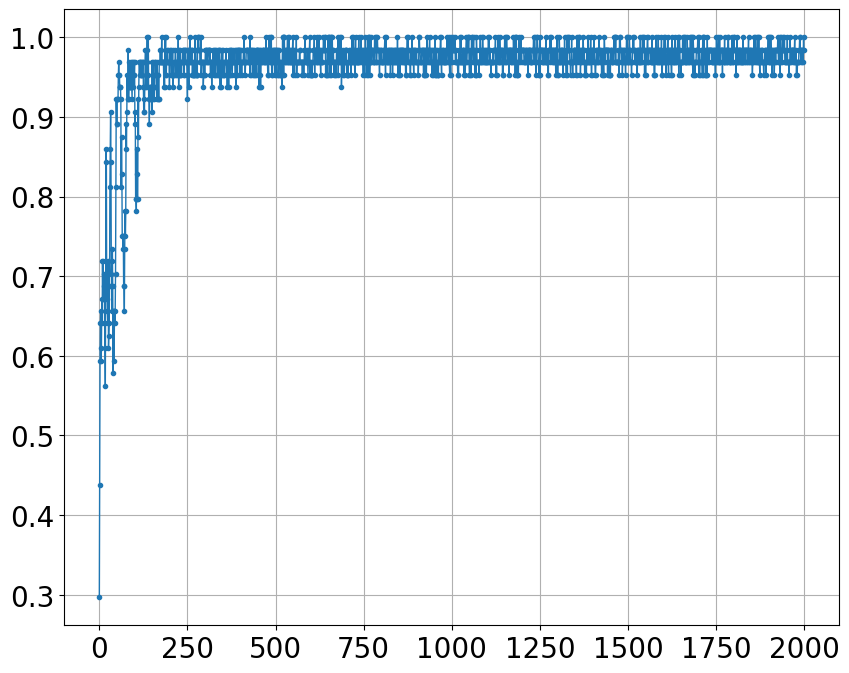

In [8]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)

In [10]:
print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))

On train:  0.973214328289032
On test:  0.9473684430122375


In [11]:
C.output([6.9, 3.1, 5.4, 2.1])

[(Array([[-21.246311,  -4.094512,  15.620367]], dtype=float32),)]

In [12]:
C=BackProp([
    Input(shape=(4,)),
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=3),  # output = number of categories
    ],learning_rate=0.001
)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs        ┃ outputs       ┃ params            ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,4]  │ float32[1,3]  │                   │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_0 │ Dense         │ float32[1,4]  │ float32[1,15] │ bias: float32[15] │
│          │               │               │               │ kernel:           │
│          │               │               │               │ float32[4,15]     │
│          │               │               │               │                   │
│          │               │               │               │ 75 (300 B)        │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_2 │ Dense         

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 4642.93it/s]

On train:  0.9821429252624512
On test:  0.9473684430122375


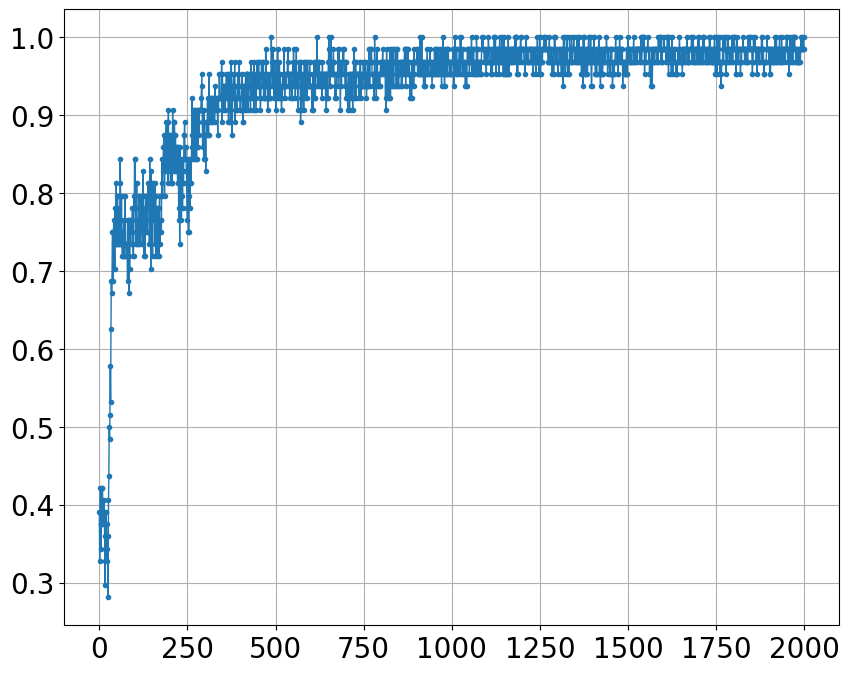

In [14]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)

print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))

In [15]:
C.output([6.9, 3.1, 5.4, 2.1])

[(Array([[ -0.4855058,  -1.4307132,  -1.2010024, -11.494466 ,  -2.048347 ,
            8.848752 ,  -3.5356941,  -4.3036027,  -7.627755 ,   6.2934995,
           -8.267211 ,  -6.3808117,  -1.8501412,   5.0034404,  -1.4406209]],      dtype=float32),),
 (Array([[-8.747061, -6.889499, 11.731068]], dtype=float32),)]

In [16]:
C=BackProp([
    Input(shape=(4,)),
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=3),  # output = number of categories
    ],learning_rate=0.001
)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs        ┃ outputs       ┃ params            ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,4]  │ float32[1,3]  │                   │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_0 │ Dense         │ float32[1,4]  │ float32[1,15] │ bias: float32[15] │
│          │               │               │               │ kernel:           │
│          │               │               │               │ float32[4,15]     │
│          │               │               │               │                   │
│          │               │               │               │ 75 (300 B)        │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_2 │ Dense         

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2842.01it/s]


On train:  0.9821429252624512
On test:  0.9473684430122375


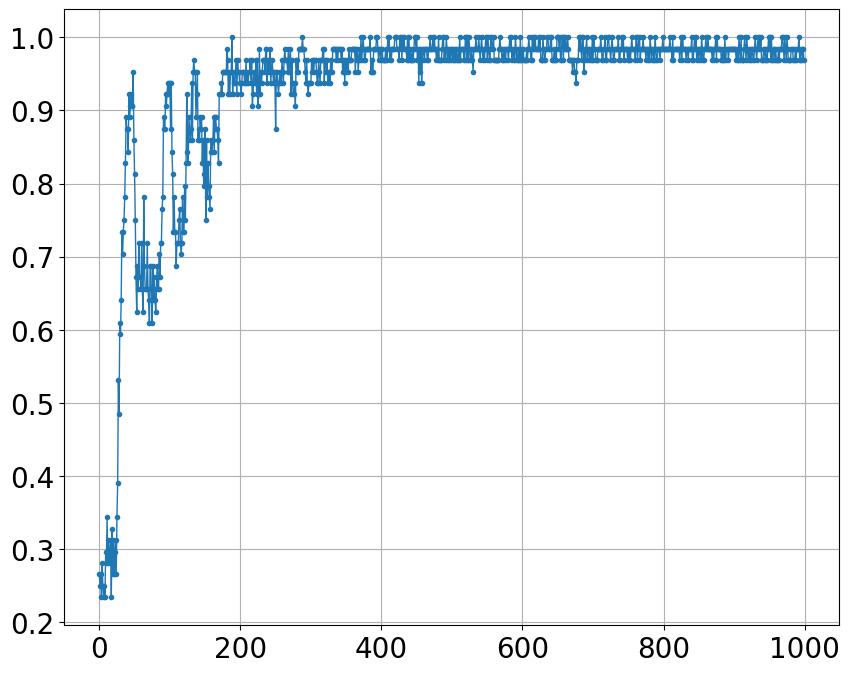

In [17]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)

print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))

# Images

In [18]:
images=image.load_images('images/digits')

[eight]: 174 files found
[nine]: 180 files found
[three]: 183 files found
[one]: 182 files found
[zero]: 178 files found
[seven]: 179 files found
[two]: 177 files found
[six]: 181 files found
[five]: 182 files found
[four]: 181 files found


In [19]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: 'eight', 'nine', 'three', 'one', 'zero', 'seven', 'two', 'six', 'five', 'four'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.

In [20]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


In [23]:
C=BackProp([
    Input(shape=(64,)),  # number of inputs
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=10),  # output = number of categories
    ],learning_rate=0.001
)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs        ┃ outputs       ┃ params            ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,64] │ float32[1,10] │                   │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_0 │ Dense         │ float32[1,64] │ float32[1,15] │ bias: float32[15] │
│          │               │               │               │ kernel:           │
│          │               │               │               │ float32[64,15]    │
│          │               │               │               │                   │
│          │               │               │               │ 975 (3.9 KB)      │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_2 │ Dense         

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 605.06it/s]


On train:  1.0
On test:  0.9333333373069763


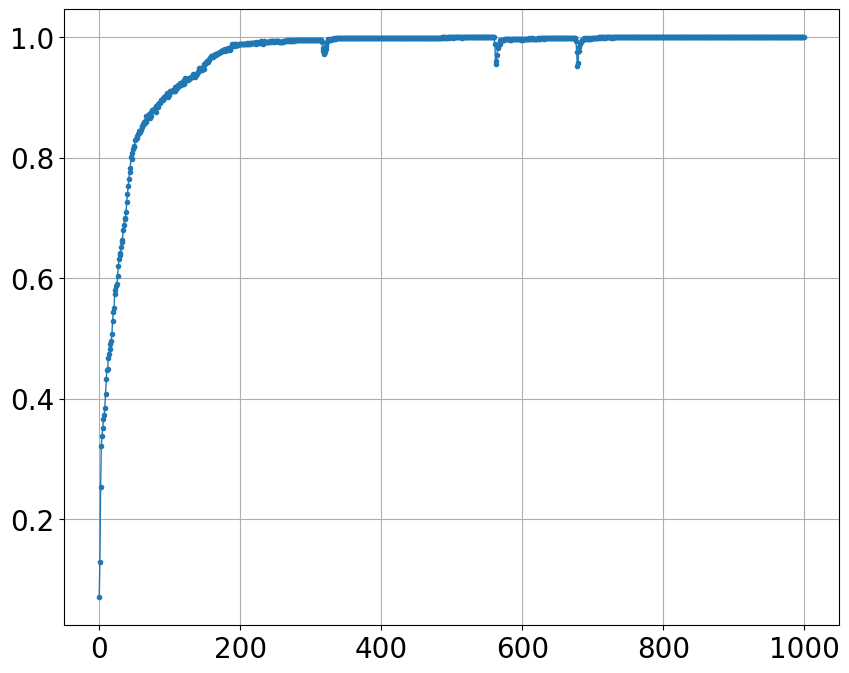

In [24]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)

print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))